In [1]:
#math and statistics.
from scipy import stats
import statistics
import math

#impot matplot and seaborn for viz.
import matplotlib.pyplot as plt
import seaborn as sns

#numpy and pandas library
import numpy as np
import pandas as pd

#dataset library
from pydataset import data
import env
import acquire


import warnings 
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# Decision Tree Exercises
## Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
df = acquire.get_titanic_data()

Using cached csv


In [3]:
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


## Clean the Data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
df = df.drop(columns = ['passenger_id','deck','embarked','class'])

In [6]:
df['sex'] = df['sex'].replace(["male",'female'], [0,1])

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone'],
      dtype='object')

In [8]:
df.age = df.age.fillna(value=df.age.median())

In [9]:
df.embark_town = df.embark_town.fillna(value="Southampton")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [11]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,0,22.0,1,0,7.2500,Southampton,0
1,1,1,1,38.0,1,0,71.2833,Cherbourg,0


In [12]:
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.survived)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.survived)

In [13]:
print(train.shape)
print(test.shape)
print(validate.shape)

(498, 9)
(179, 9)
(214, 9)


In [15]:
type(train['survived'])

pandas.core.series.Series

## Question 1: All About That Base(line)
**What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.**

In [18]:
train['baseline'] = 0

In [19]:
baseline_accurancy = (train.survived == train.baseline).mean()

In [20]:
print(f'The baseline accuracy is {baseline_accurancy:.2%}')

The baseline accuracy is 61.65%


## Question 2: Fit-Transform
**Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)**

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
np.random.seed(25)

In [ ]:
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.survived)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.survived)

In [23]:
X = df[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = df.survived

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [24]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- pclass <= 2.50
|   |--- fare <= 13.68
|   |   |--- fare <= 7.75
|   |   |   |--- class: 0
|   |   |--- fare >  7.75
|   |   |   |--- class: 0
|   |--- fare >  13.68
|   |   |--- age <= 45.25
|   |   |   |--- class: 1
|   |   |--- age >  45.25
|   |   |   |--- class: 0
|--- pclass >  2.50
|   |--- age <= 6.50
|   |   |--- sibsp <= 2.50
|   |   |   |--- class: 1
|   |   |--- sibsp >  2.50
|   |   |   |--- class: 0
|   |--- age >  6.50
|   |   |--- age <= 32.50
|   |   |   |--- class: 0
|   |   |--- age >  32.50
|   |   |   |--- class: 0



TypeError: can only concatenate str (not "numpy.int64") to str

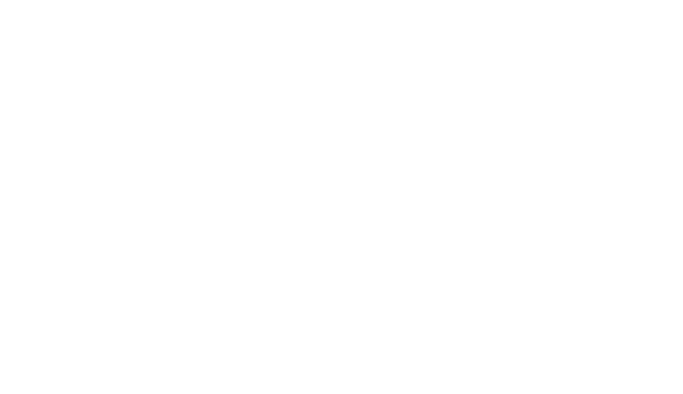

In [154]:
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [27]:
tree.score(X_train, y_train)

0.7248995983935743

In [28]:
predictions = tree.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       170
           1       0.69      0.54      0.61        98

    accuracy                           0.74       268
   macro avg       0.73      0.70      0.71       268
weighted avg       0.74      0.74      0.73       268



In [29]:
predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        81
           1       0.58      0.48      0.53        44

    accuracy                           0.70       125
   macro avg       0.66      0.65      0.65       125
weighted avg       0.69      0.70      0.69       125



## Question 3  Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [30]:
pd.DataFrame(classification_report(actual, predictions,
                      output_dict=True)).T

,precision,recall,f1-score,support
0,0.741573,0.814815,0.776471,81.000
1,0.583333,0.477273,0.525000,44.000
accuracy,0.696000,0.696000,0.696000,0.696
macro avg,0.662453,0.646044,0.650735,125.000
weighted avg,0.685873,0.696000,0.687953,125.000


## Question 4,  Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [31]:
from sklearn.metrics import confusion_matrix


In [32]:
# confusion matrix - actual on left, predicted on top
pd.DataFrame(confusion_matrix(actual, predictions))

,0,1
0,66,15
1,23,21


## Question 5, Run through steps 2-4 using a different max_depth value.

In [33]:
X = df[['age', 'fare','sex']]
y = df.survived

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [34]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- sex <= 0.50
|   |--- age <= 6.50
|   |   |--- fare <= 26.95
|   |   |   |--- class: 1
|   |   |--- fare >  26.95
|   |   |   |--- class: 0
|   |--- age >  6.50
|   |   |--- fare <= 26.27
|   |   |   |--- class: 0
|   |   |--- fare >  26.27
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- fare <= 70.28
|   |   |--- fare <= 69.43
|   |   |   |--- class: 1
|   |   |--- fare >  69.43
|   |   |   |--- class: 0
|   |--- fare >  70.28
|   |   |--- class: 1



In [36]:
tree.score(X_train, y_train)

0.8032128514056225

In [37]:
predictions = tree.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       170
           1       0.73      0.70      0.72        98

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [38]:
predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        81
           1       0.68      0.77      0.72        44

    accuracy                           0.79       125
   macro avg       0.77      0.79      0.78       125
weighted avg       0.80      0.79      0.79       125



In [39]:
pd.DataFrame(classification_report(actual, predictions,
                      output_dict=True)).T

,precision,recall,f1-score,support
0,0.866667,0.802469,0.833333,81.000
1,0.680000,0.772727,0.723404,44.000
accuracy,0.792000,0.792000,0.792000,0.792
macro avg,0.773333,0.787598,0.778369,125.000
weighted avg,0.800960,0.792000,0.794638,125.000


## Question 6, Which model performs better on your in-sample data?

Model 2 performance better on my in-sample data. 

## Question 7, Which model performs best on your out-of-sample data, the validate set?



Model 2 performance better on my out of sample data, the validate set. 

# Random Forest Exercises

### Question 1: Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

**Train Model
Create the object**

In [83]:
# create the classifier object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10,min_samples_leaf=1,random_state=1349)

**Fit the model**

Fit the random forest algorithm to the training data.

In [84]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1349)

In [86]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- sex <= 0.50
|   |--- age <= 6.50
|   |   |--- fare <= 26.95
|   |   |   |--- class: 1
|   |   |--- fare >  26.95
|   |   |   |--- class: 0
|   |--- age >  6.50
|   |   |--- fare <= 26.27
|   |   |   |--- class: 0
|   |   |--- fare >  26.27
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- fare <= 70.28
|   |   |--- fare <= 69.43
|   |   |   |--- class: 1
|   |   |--- fare >  69.43
|   |   |   |--- class: 0
|   |--- fare >  70.28
|   |   |--- class: 1



**Feature Importance**

Evaluate importance, or weight, of each feature.

The higher number the feature importance == more important the feature.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

In [87]:
print(rf.feature_importances_)

[0.31135902 0.38697552 0.30166546]


**Make Predictions**

Classify each flower by its estimated species.



In [88]:
y_pred = rf.predict(X_train)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Estimate Probability**

Estimate the probability of outcome, using the training data.



In [89]:
y_pred_proba = rf.predict_proba(X_train)

### Question 2: Evaluate your results using the model score, confusion matrix, and classification report.

### Question 3: Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

**Evaluate Model**

Compute the Accuracy

In [90]:
rf.score(X_train, y_train)

0.9337349397590361

**Create a confusion matrix**

In [91]:
print(confusion_matrix(y_train, y_pred))

[[288  10]
 [ 23 177]]


In [92]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       298
           1       0.95      0.89      0.91       200

    accuracy                           0.93       498
   macro avg       0.94      0.93      0.93       498
weighted avg       0.93      0.93      0.93       498



In [65]:
rf.score(X_validate, y_validate)

0.784

### Question 4, Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [116]:
max_depth = 10
min_samples_leaf = 1 
metrics = []

for i in range(1,max_depth):
    depth = max_depth - i
    n_samples = i
    rf = RandomForestClassifier(max_depth = depth,
                            min_samples_leaf = n_samples,
                            random_state=1349)
    rf.fit(X_train, y_train)
    in_sample_accuracy = rf.score(X_train, y_train)
    metrics.append(in_sample_accuracy)
    
metrics


[0.9176706827309237,
 0.8835341365461847,
 0.8514056224899599,
 0.8192771084337349,
 0.8032128514056225,
 0.7991967871485943,
 0.7951807228915663,
 0.7971887550200804,
 0.7550200803212851]

In [142]:
max_depth = 11
score = []

for i in range(2, max_depth):
    depth = max_depth - i
    sample_size = i
    
    rf = RandomForestClassifier(max_depth=depth,
                                min_samples_leaf = sample_size,
                                random_state=1349)
    rf.fit(X_train, y_train)

    in_sample = rf.score(X_train, y_train)
    out_of_sample = rf.score(X_validate, y_validate)
    
    output = {"max_depth" :depth, 
              "sample_leaf" : sample_size, 
              "in_sample_accuracy" :in_sample.round(2),
              "out_of_sample_accuracy":out_of_sample.round(2),
             }
    
    score.append(output)
   
df = pd.DataFrame(score)
df

,max_depth,sample_leaf,in_sample_accuracy,out_of_sample_accuracy
0,9,2,0.90,0.81
1,8,3,0.87,0.79
2,7,4,0.84,0.78
3,6,5,0.82,0.79
4,5,6,0.81,0.79
5,4,7,0.80,0.79
6,3,8,0.80,0.78
7,2,9,0.79,0.78
8,1,10,0.75,0.79


## Question 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [152]:
df.sort_values(by='in_sample_accuracy', ascending=False).head(1)

,max_depth,sample_leaf,in_sample_accuracy,out_of_sample_accuracy
0,9,2,0.9,0.81


In [153]:
df.sort_values(by='out_of_sample_accuracy', ascending=False).head(1)

,max_depth,sample_leaf,in_sample_accuracy,out_of_sample_accuracy
0,9,2,0.9,0.81
